## Mall Customer Segmentation

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Importing Dataset

In [34]:
data = pd.read_csv('segmentation data.csv')
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


#### Information of values contained in columns
-------------------------------
- Sex (Gender) : 0 : Female 1: Male
- Marital Status : 0: Single, 1: Non-single (divorced/separated/married/widowed)
- Age : Age of Customers
- Education : 0 : Others , 1 : Under Graduates , 2 : Post Graduates
- Income : Customer Income
- Occupation : 0 : Unemployed, 1 : Employed , 2 : Highly Employed
- Settlement Size (Size of Cities the customer lives): 0 : Small City , 1 : Med Size City , 2 : Large Cities

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [36]:
num_columns = ['ID', 'Age', 'Income']
cat_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

data[cat_columns] = data[cat_columns].astype('category')

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


In [38]:
data.describe(include='category').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


### Exploratory Data Analysis (EDA)

#### Numerical Features Distribution

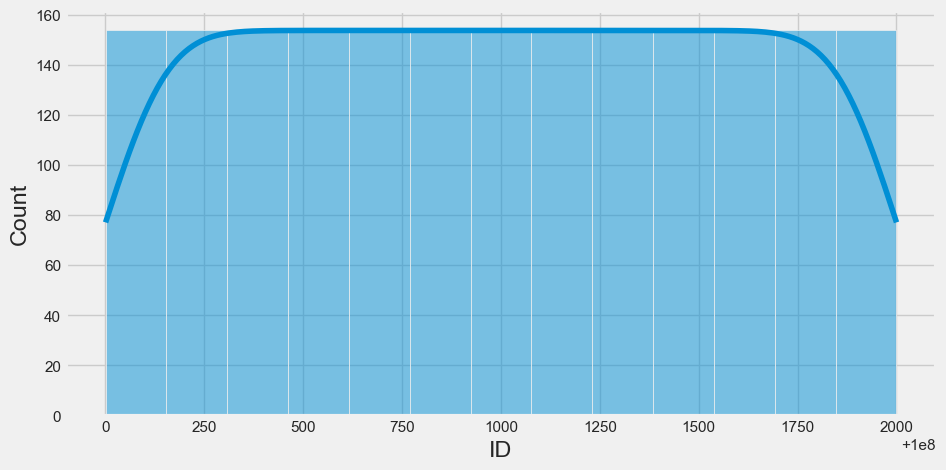

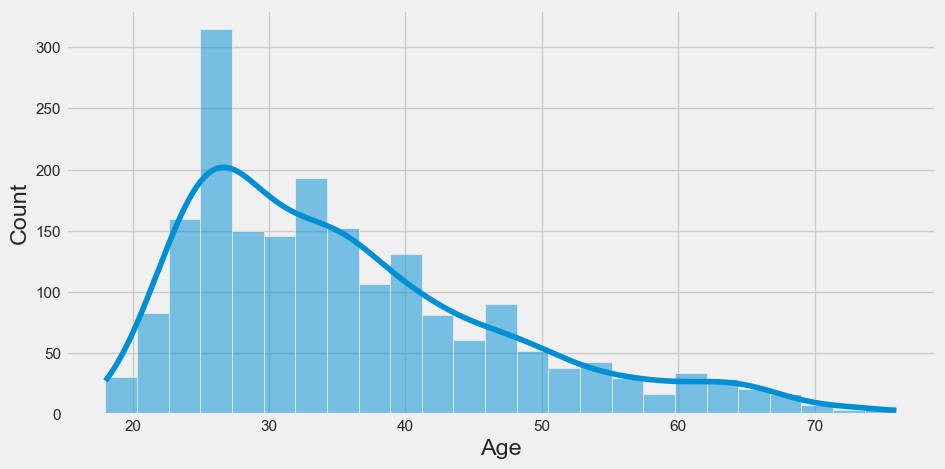

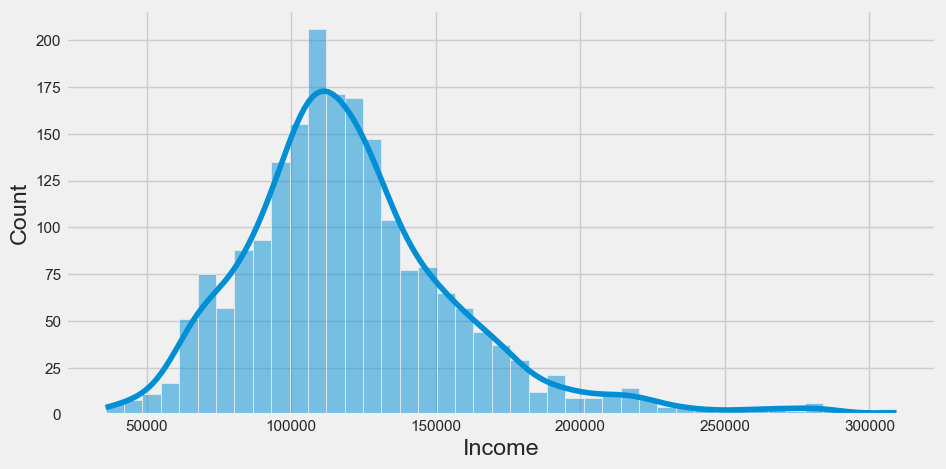

In [39]:
for i in num_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data[i], kde=True)
    plt.savefig(f'{i}.png')
    plt.show()

#### Categorical Variables Distribution

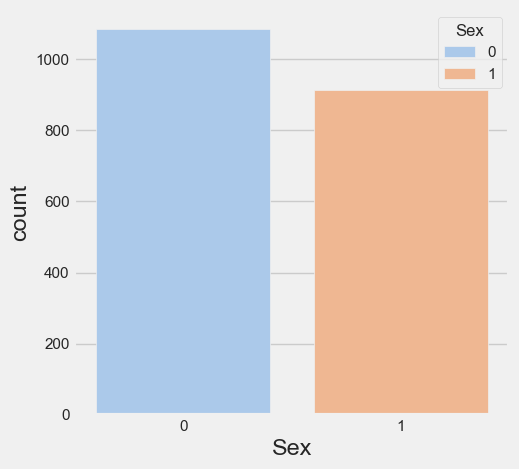

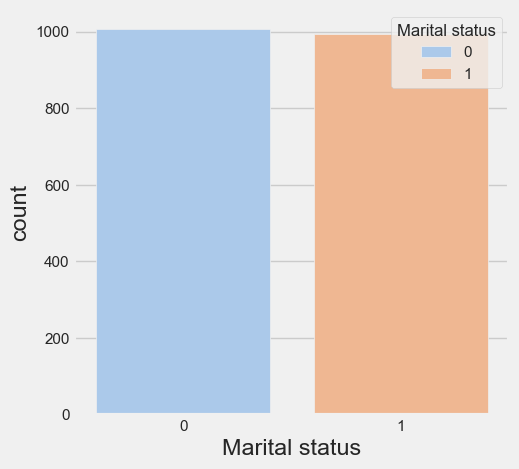

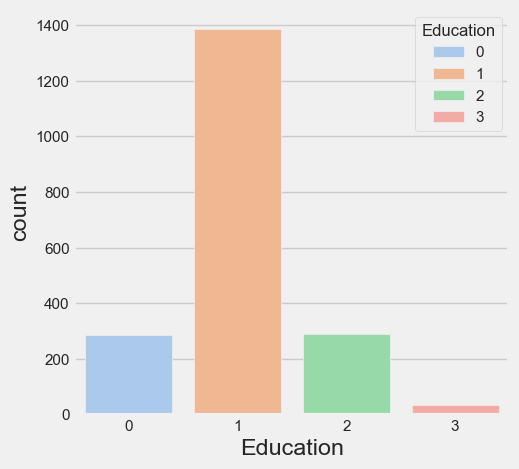

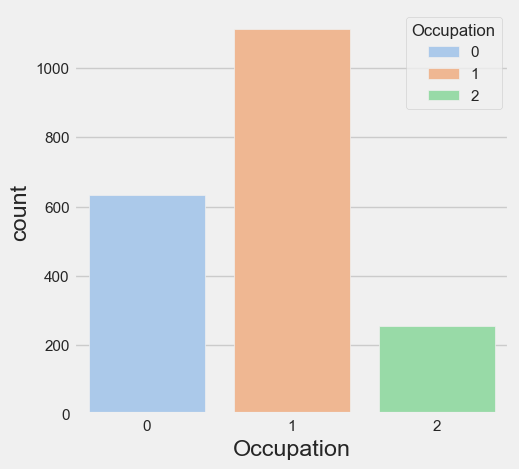

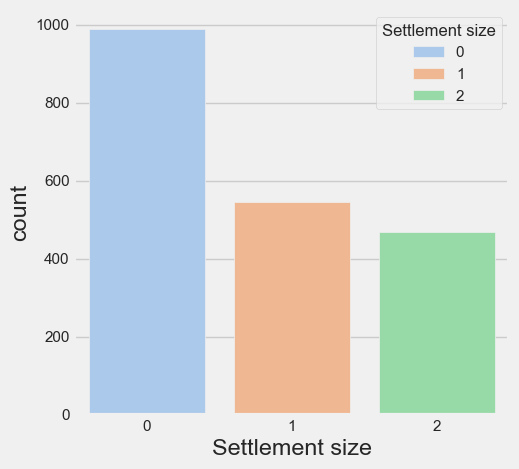

In [40]:
for category in cat_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x = data[category], palette='pastel', hue = data[category])
    #plt.savefig(f'{category}.png')
    plt.show()

### Bivariate Analysis [Numerical Features]


Correlation between Age and Income:  0.3406101637317351  => 0.340 [Small Correlation]


<Axes: xlabel='Age', ylabel='Income'>

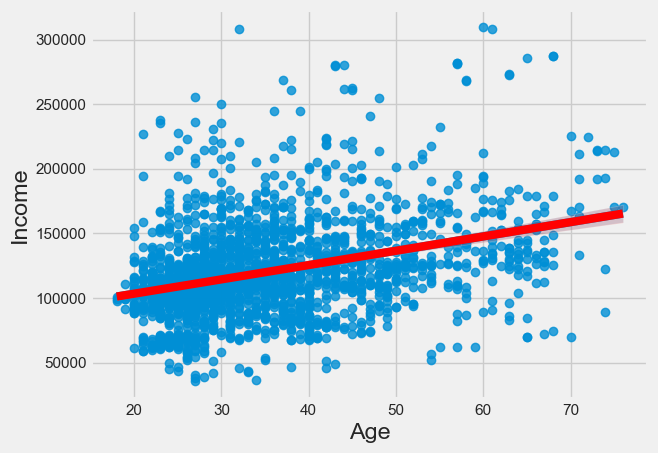

In [41]:
print('Correlation between Age and Income: ', data['Age'].corr(data['Income']) , ' => 0.340 [Small Correlation]')
sns.regplot(x = 'Age', y = 'Income', data = data)
sns.regplot(x = 'Age', y = 'Income', data = data, scatter = False, color = 'red')


<Axes: xlabel='Age', ylabel='Income'>

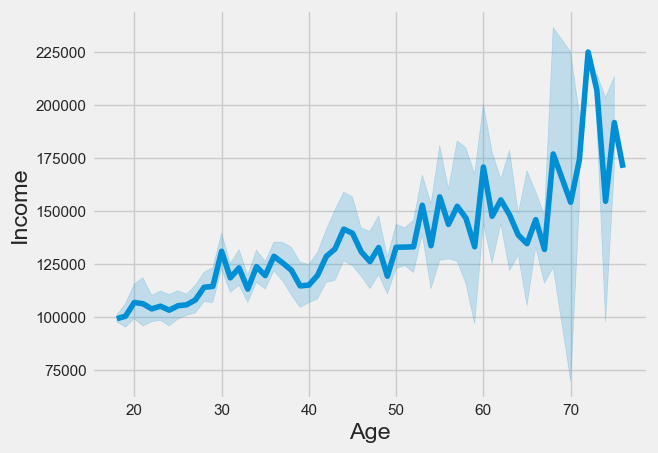

In [42]:
sns.lineplot(x = 'Age', y = 'Income', data = data)

### Numerical Vs Categorical Features

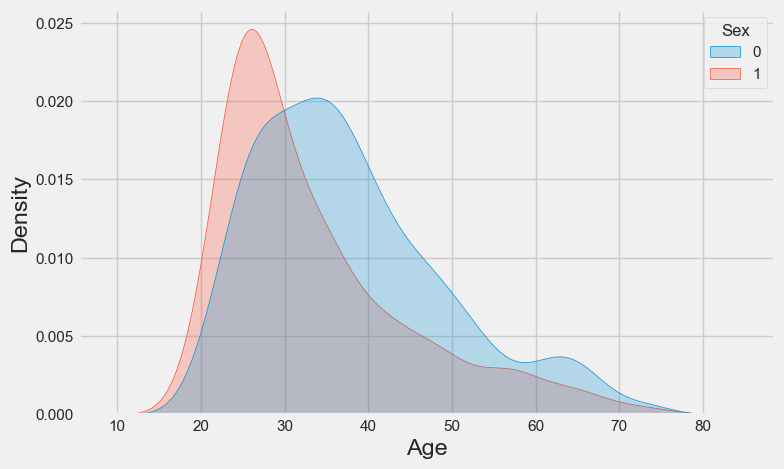

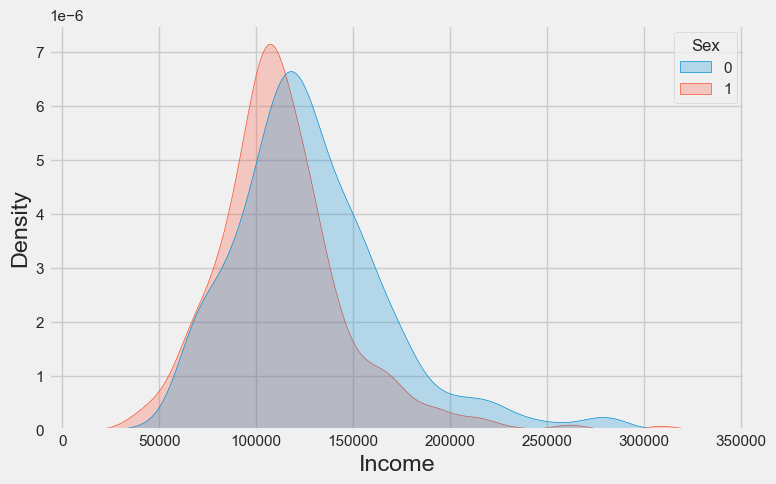

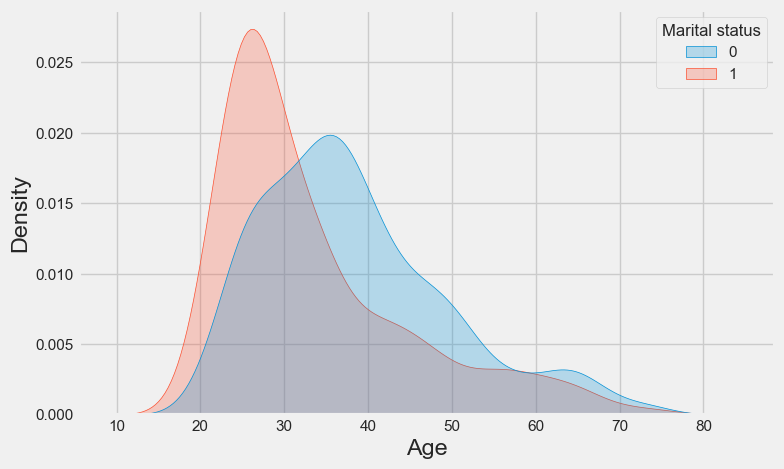

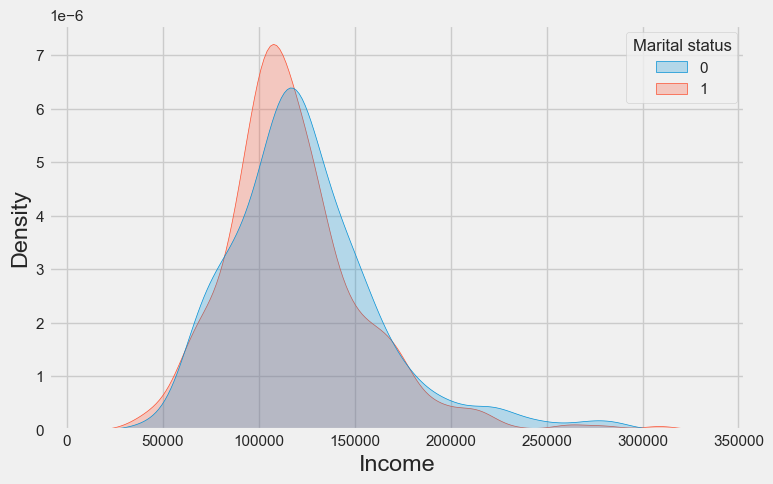

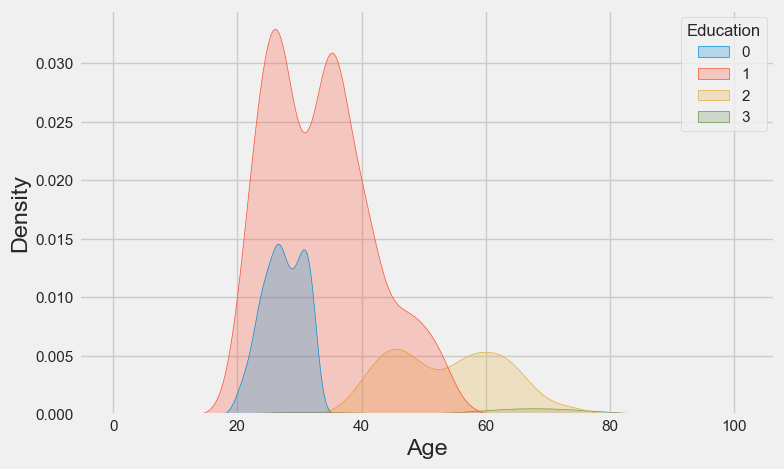

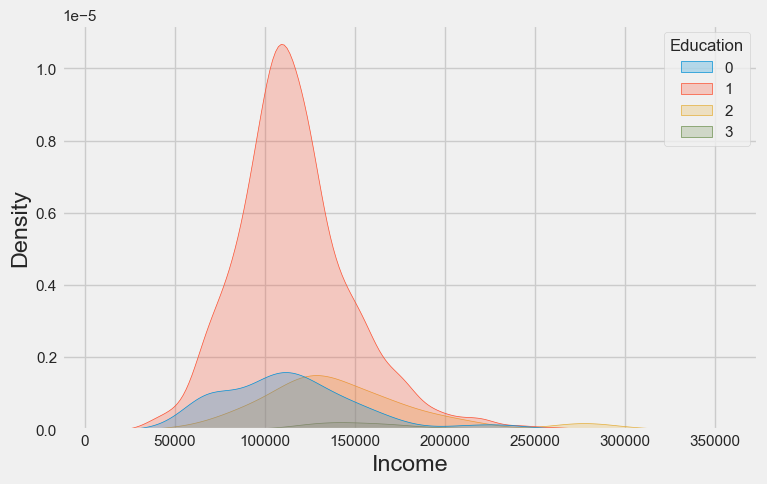

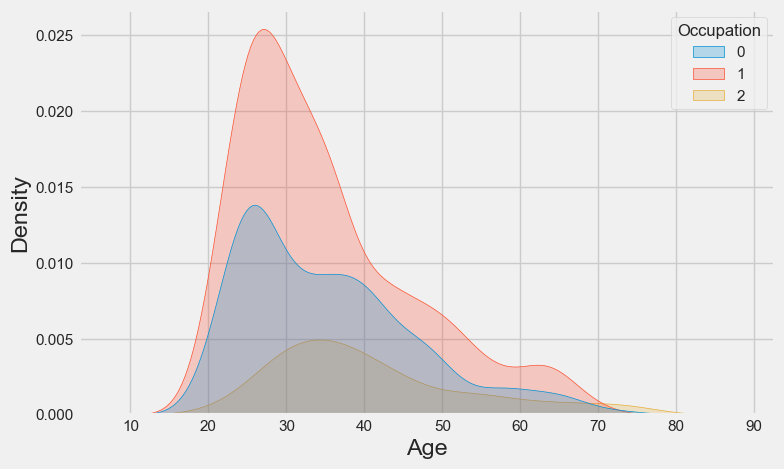

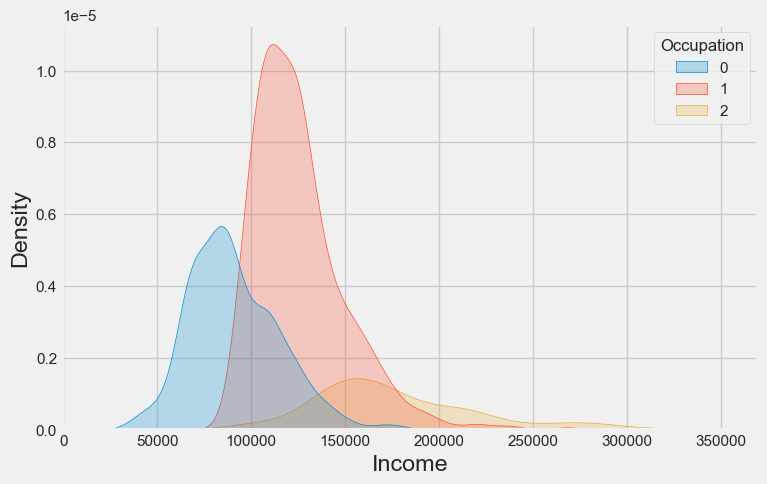

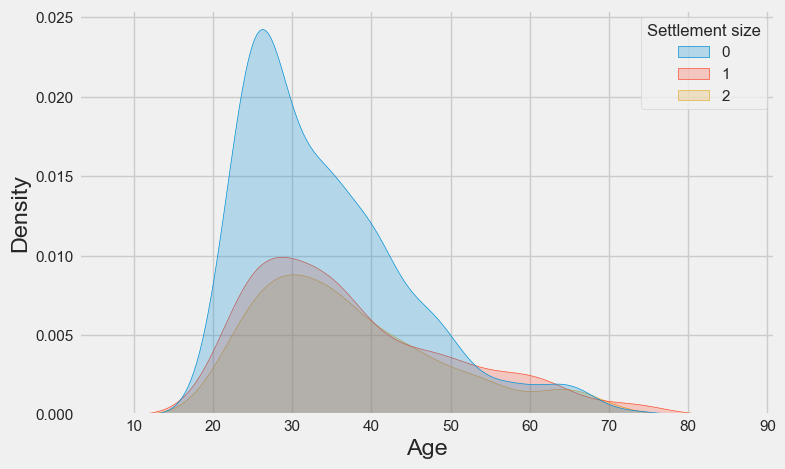

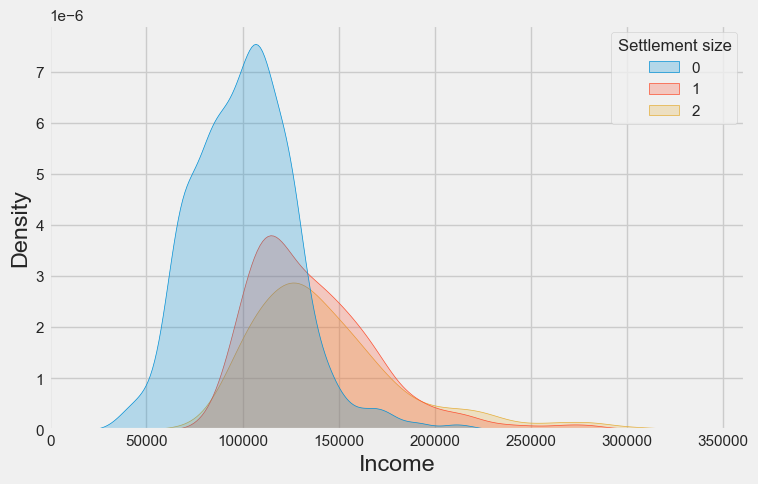

In [43]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,5))
            sns.kdeplot(data=data, x=numerical, hue=category, fill=True)
            plt.show()

#### Correlation Heatmap

<Axes: >

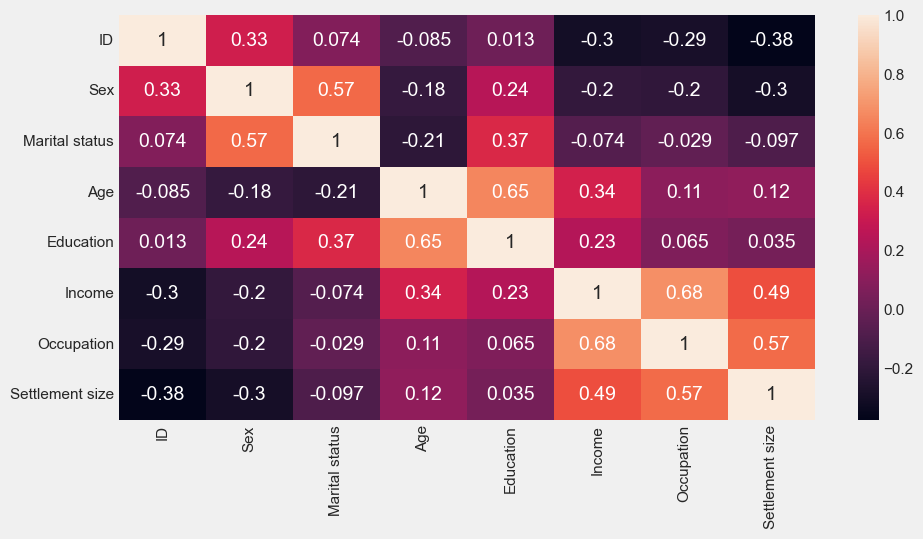

In [44]:
ax, fig = plt.subplots(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True)

In [46]:
# Correlation values > 0.5

data.corr()[data.corr() > 0.5]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,1.000000,0.566511,NaN,NaN,NaN,NaN,NaN
Marital status,NaN,0.566511,1.000000,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.000000,0.654605,NaN,NaN,NaN
Education,NaN,NaN,NaN,0.654605,1.000000,NaN,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN,1.000000,0.680357,NaN
Occupation,NaN,NaN,NaN,NaN,NaN,0.680357,1.000000,0.571795
Settlement size,NaN,NaN,NaN,NaN,NaN,NaN,0.571795,1.000000


#### Categorical Vs Categorical Features

In [47]:
cat_2 =  cat_columns.copy()
print(cat_columns)
print(cat_2)

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']


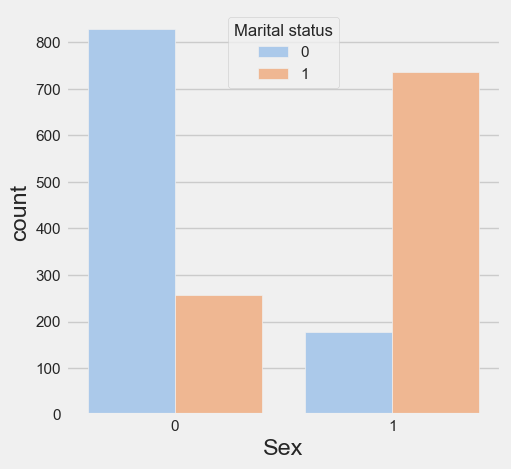

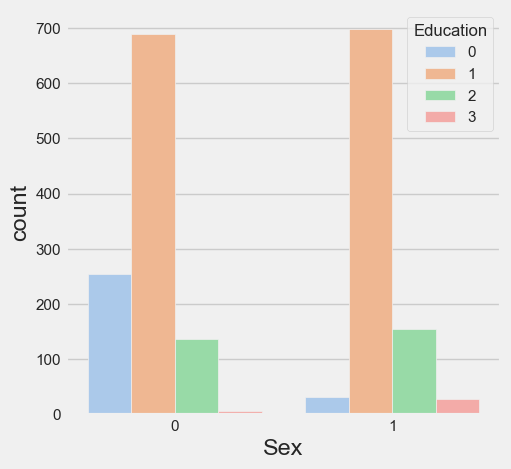

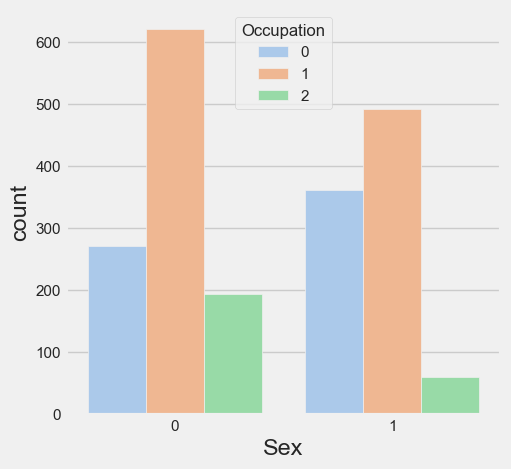

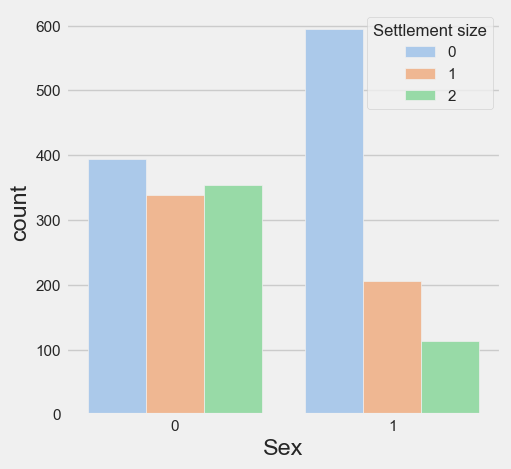

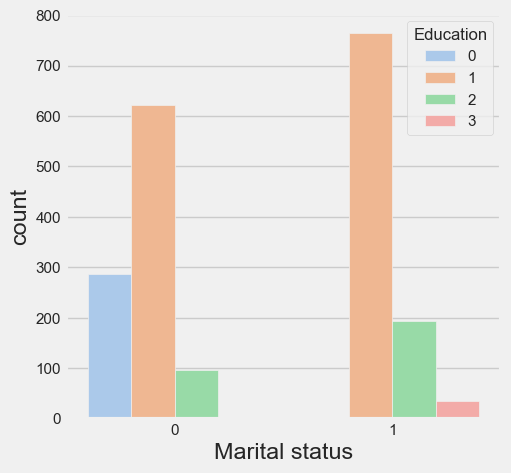

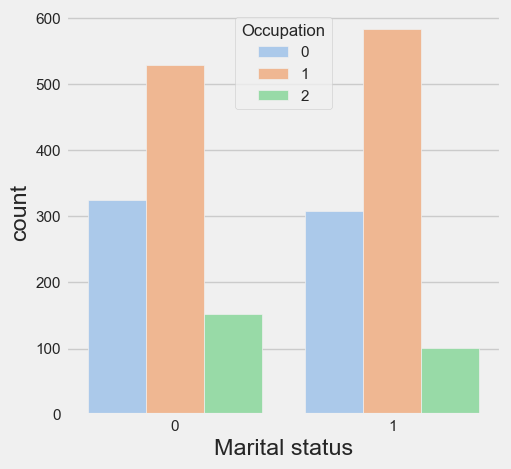

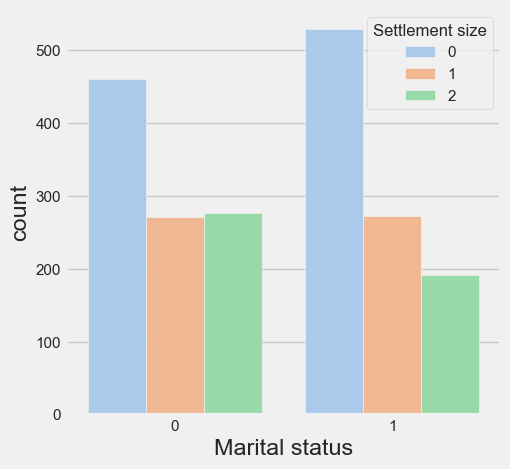

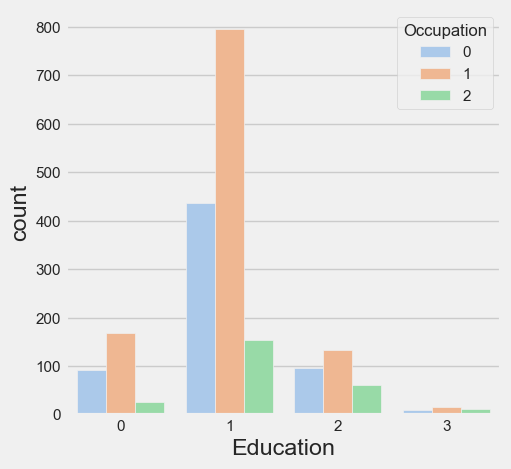

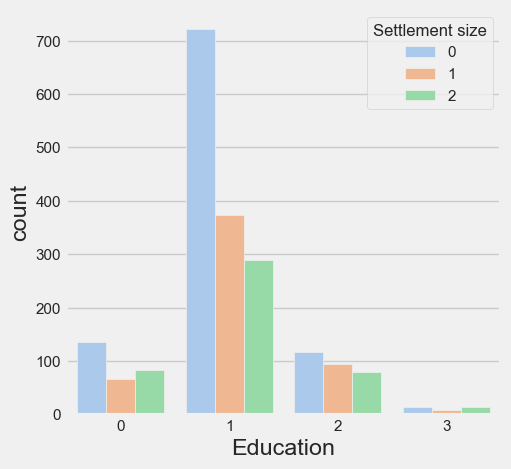

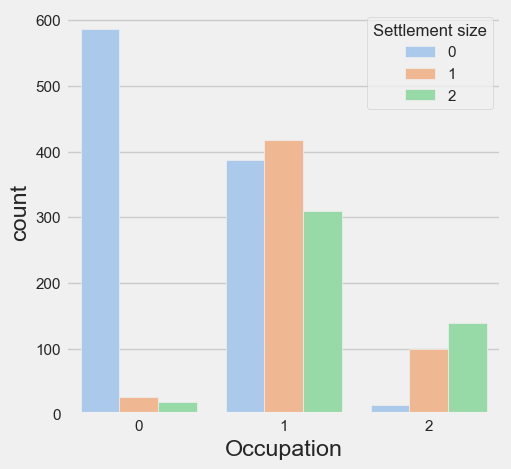

In [48]:
for category1 in cat_columns:
    cat_2.pop(0)
    for category2 in cat_2:
        if category1 != category2:
            plt.figure(figsize=(5,5))
            sns.countplot(x = data[category1], hue = data[category2], palette='pastel')
            plt.show()

Conclusions drawn from the data:
---------------------------------------

1) People with Occupation = '0' (unemployed) tend to live in small cities within the customers

2) Married people tend to have either highschool-level or post-graduate-level educations within the customers

3) Married people also tend to live in smaller cities

4) Women within the customer list tend to be married more often than men

5) Males tend to be employed more often within the customer list. Women, on the other hand, tend to be unemployed more often

#### Multivariate Analysis

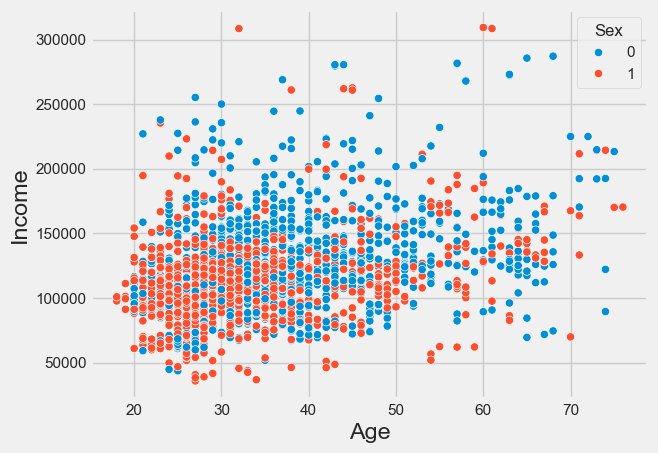

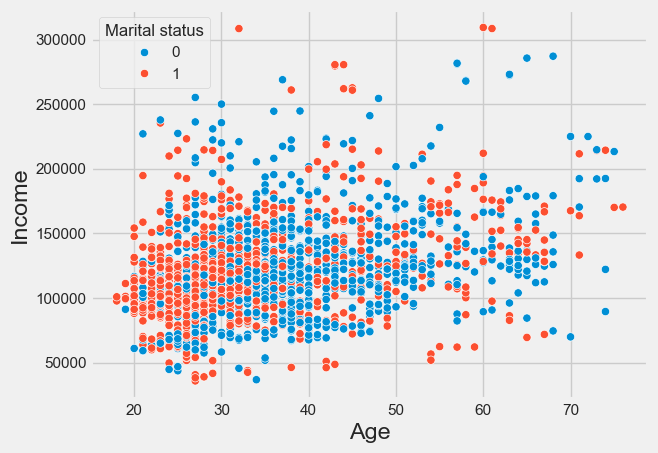

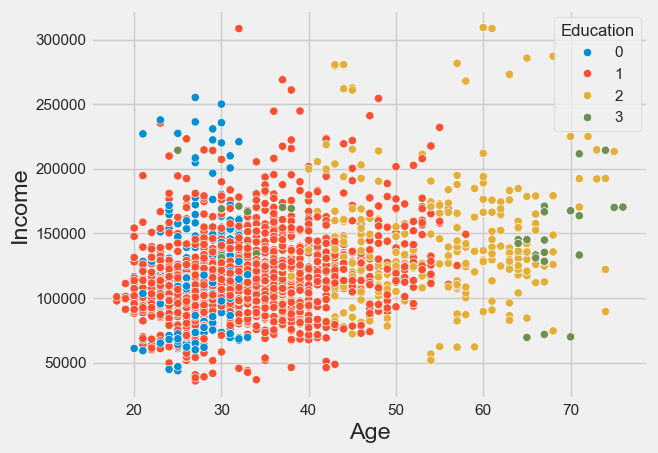

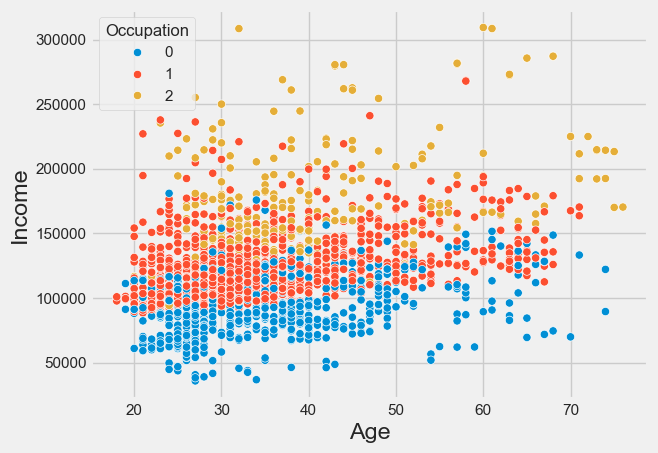

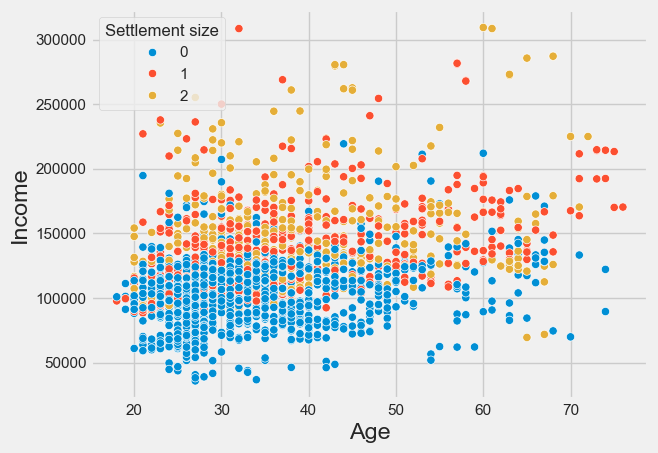

In [49]:
for cat in cat_columns:
    sns.scatterplot(x = 'Age', y = 'Income', hue = cat, data = data)
    plt.show()

conclusions for the multivariate analysis:
-------------------------------------

1) People who live in smaller cities tend to have lower income 

2) People who have managerial jobs or own businesses have higher income than employees, who have higher income than unemployed

3) Highly educated people tend to be older, but income doesn't seem to be influenced by education level

4) Non-single people tend to have lower income and are younger than single people on average in the dataset

5) Males tend to have a higher income than women when they are older

### Normalization

In [51]:
data.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [52]:
final_data = data[['Age', 'Income']]
final_data

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
...,...,...
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(final_data)
X[0]

array([0.84482759, 0.32478101])

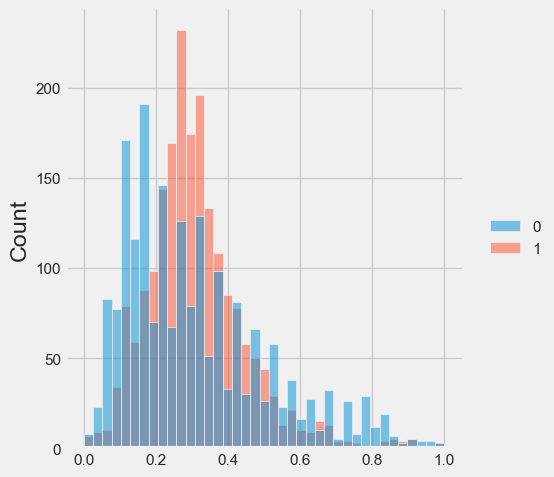

In [57]:
sns.displot(X)

### K-Means Clustering

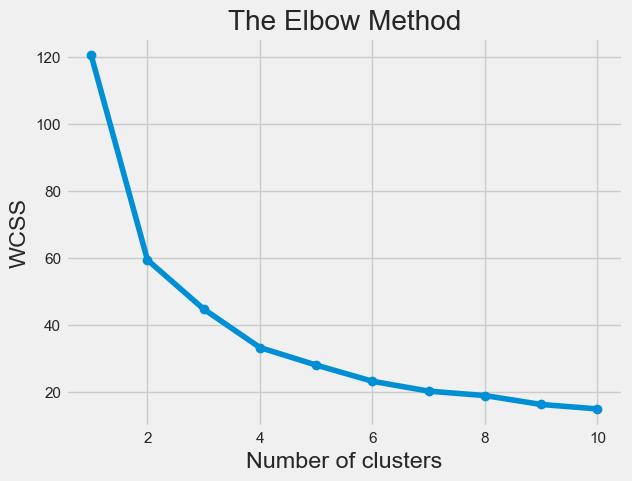

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.style.use('fivethirtyeight')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
K = 6
kmeans = KMeans(n_clusters = K, init = 'k-means++', random_state = 42, n_init='auto')
y_kmeans = kmeans.fit(X)

In [60]:
y_kmeans.labels_

array([1, 5, 2, ..., 0, 4, 4])

In [61]:
y_kmeans.cluster_centers_

array([[0.30837871, 0.24067995],
       [0.76847291, 0.39638445],
       [0.50240832, 0.32842229],
       [0.50410509, 0.72625141],
       [0.12733663, 0.22788916],
       [0.23470353, 0.44310615]])

#### Visualizing the Clusters

In [25]:
resulted_df = pd.DataFrame(data = data, columns = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size'])
resulted_df['Cluster'] = kmeans.labels_
resulted_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,4
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,0
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,0
...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0,3
1996,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0,1
1997,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0,0
1998,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0,1


In [26]:
resulted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              2000 non-null   float64
 1   Marital status   2000 non-null   float64
 2   Age              2000 non-null   float64
 3   Education        2000 non-null   float64
 4   Income           2000 non-null   float64
 5   Occupation       2000 non-null   float64
 6   Settlement size  2000 non-null   float64
 7   Cluster          2000 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 117.3 KB


#### Visualizing the Clusters

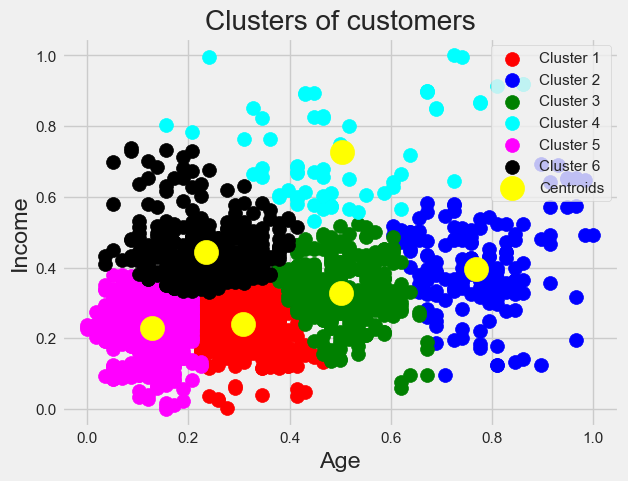

In [66]:
plt.scatter(X[y_kmeans.labels_ == 0, 0], X[y_kmeans.labels_ == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans.labels_ == 1, 0], X[y_kmeans.labels_ == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans.labels_ == 2, 0], X[y_kmeans.labels_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans.labels_ == 3, 0], X[y_kmeans.labels_ == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans.labels_ == 4, 0], X[y_kmeans.labels_ == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans.labels_ == 5, 0], X[y_kmeans.labels_ == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### Agglomerative Clustering

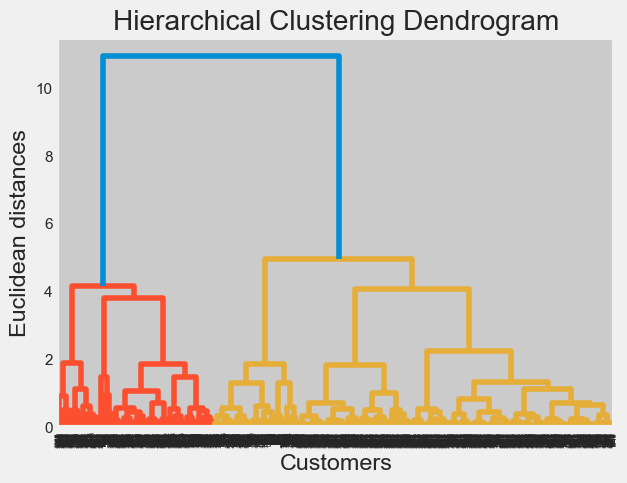

In [68]:
# Dendogram

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 2, 3, ..., 0, 0, 0], dtype=int64)

In [78]:
pd.value_counts(y_hc) # Clusters

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_6464\3714885746.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_hc)


0    725
4    412
3    363
2    300
1    152
5     48
Name: count, dtype: int64

In [81]:
final_data

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
...,...,...
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968


In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(final_data)
reduced_data

array([[ 3.71558424e+03,  3.07018075e+01],
       [ 2.98185794e+04, -1.70323777e+01],
       [-3.17444175e+04,  1.64161016e+01],
       ...,
       [-3.45544193e+04, -1.28956197e+00],
       [-2.29864201e+04, -9.50126394e+00],
       [-5.25384199e+04, -5.40580945e+00]])

In [83]:
reduced_data.shape

(2000, 2)

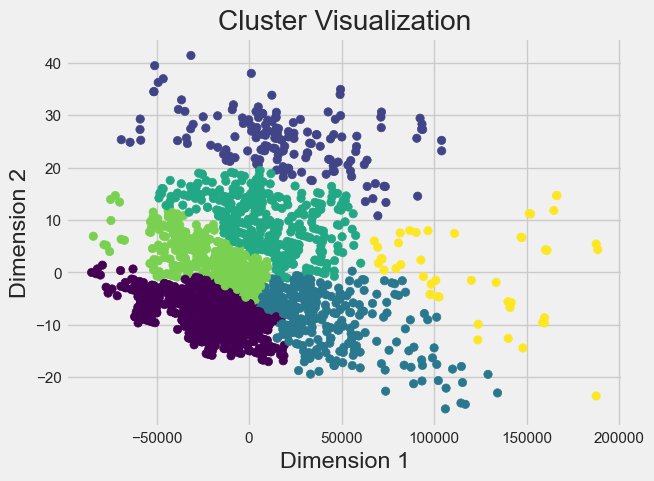

In [92]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c = y_hc, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


#### Summary of Clusters

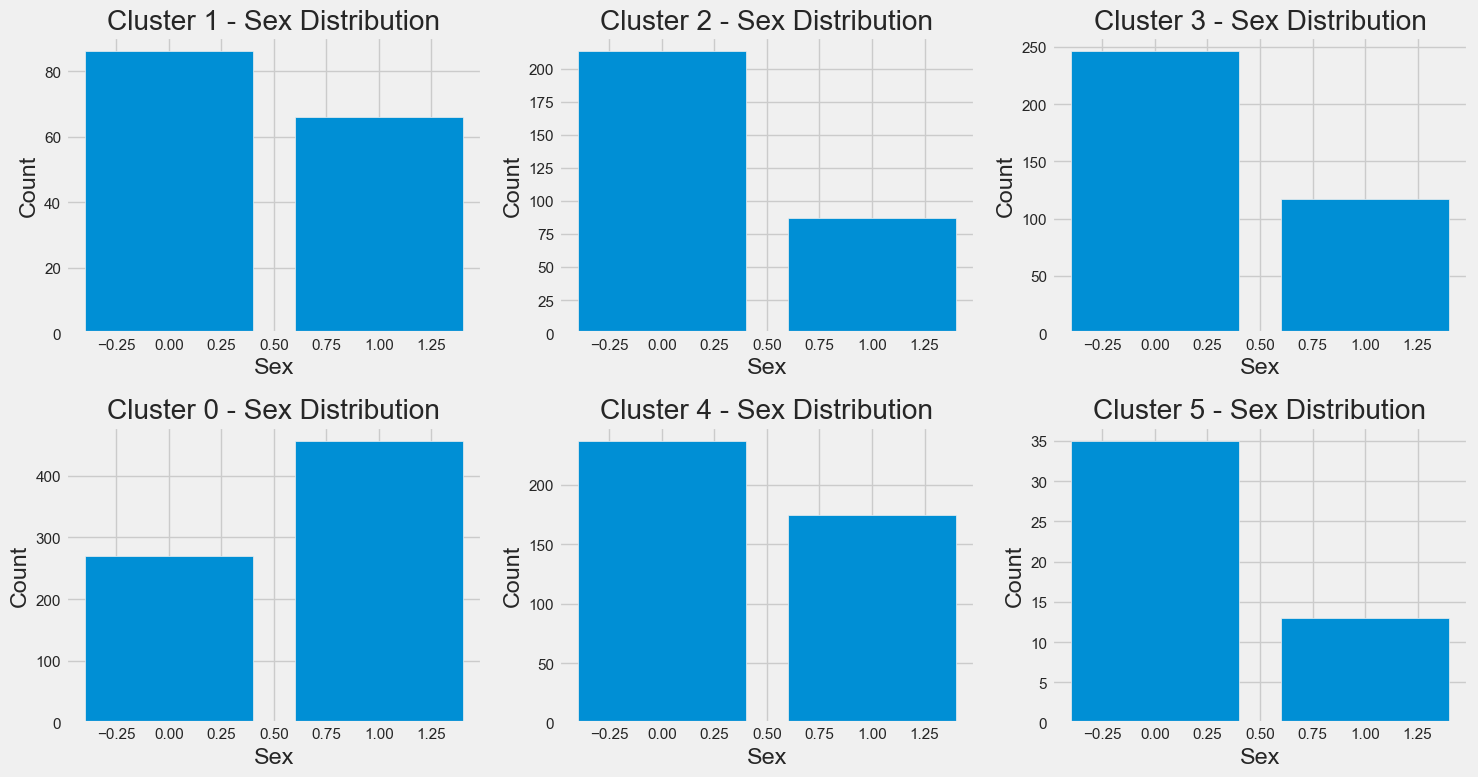

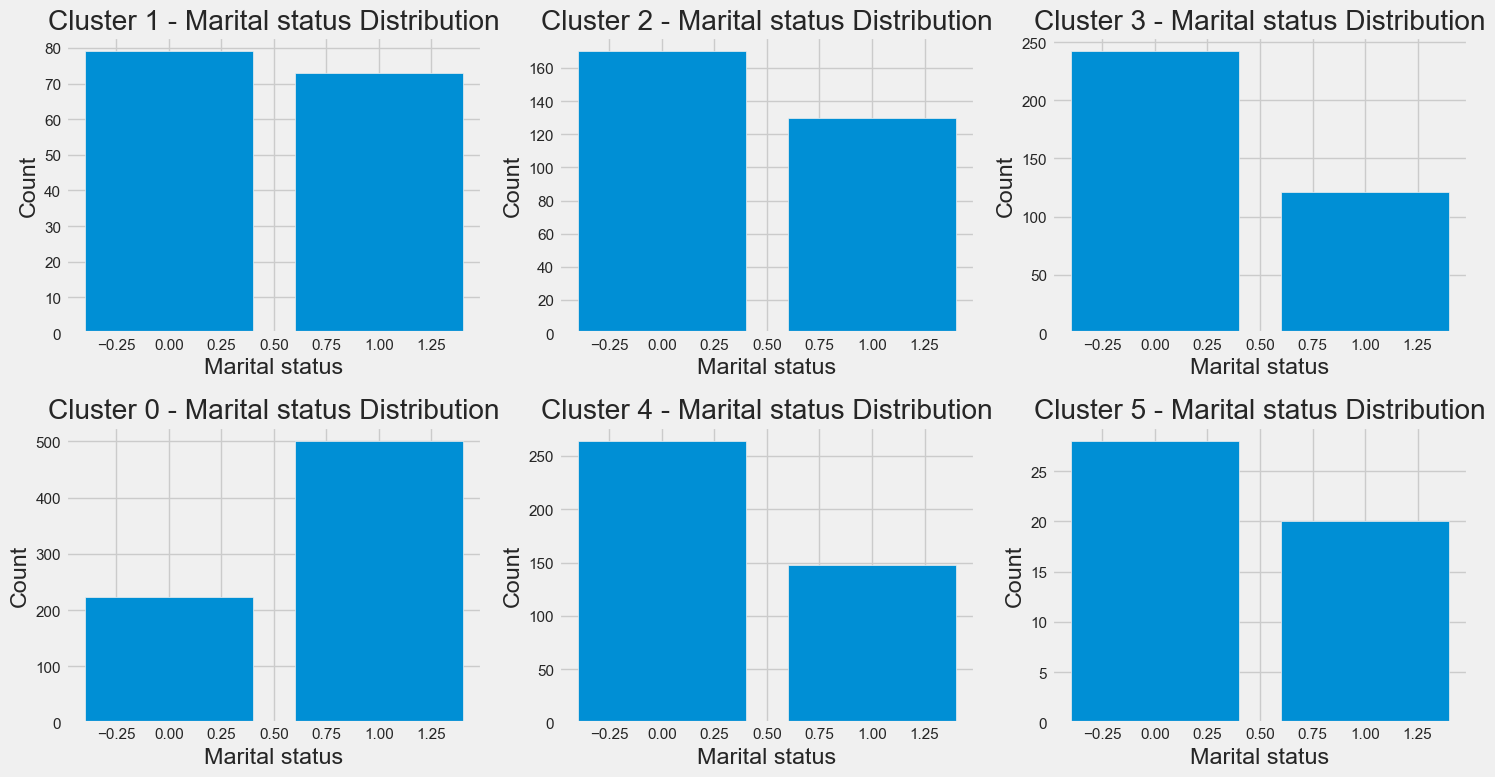

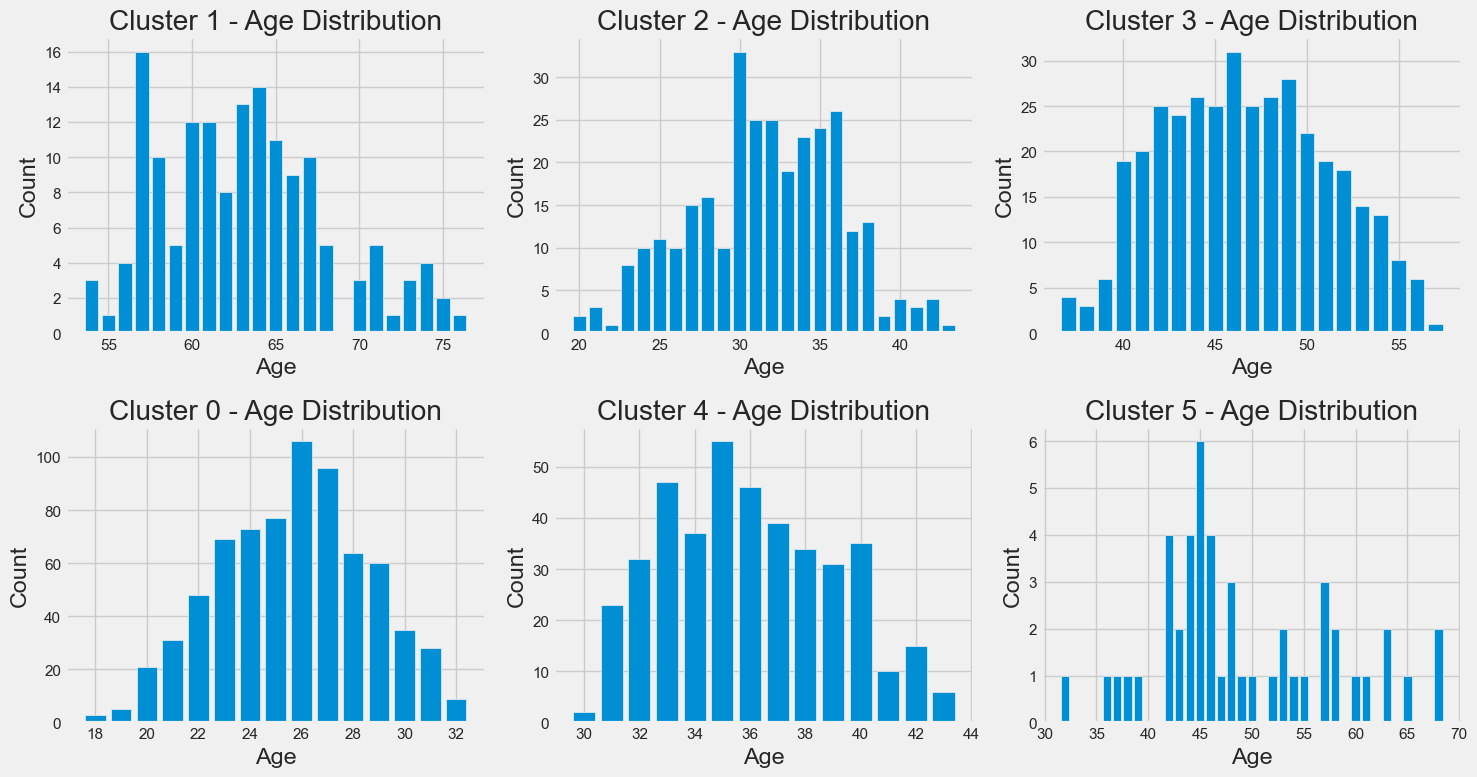

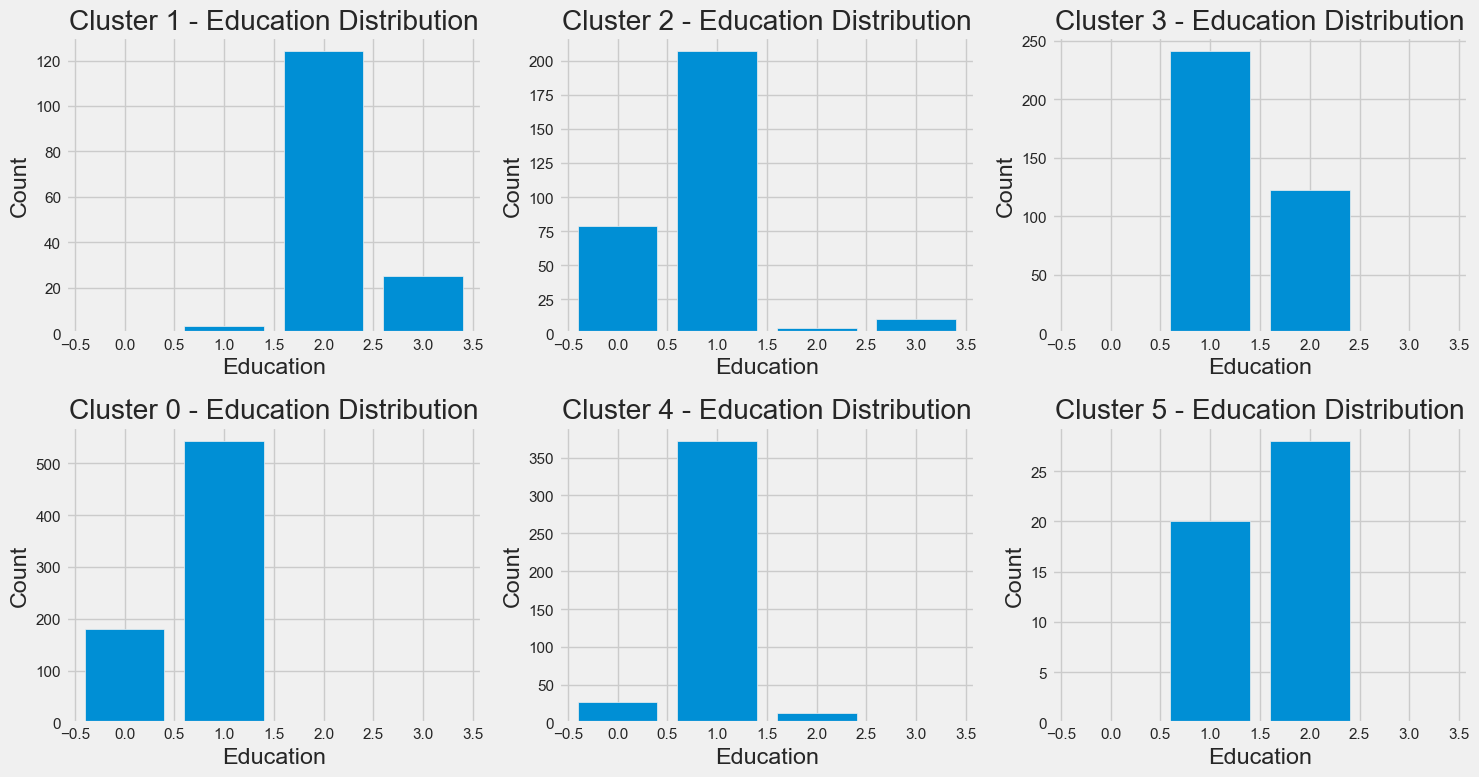

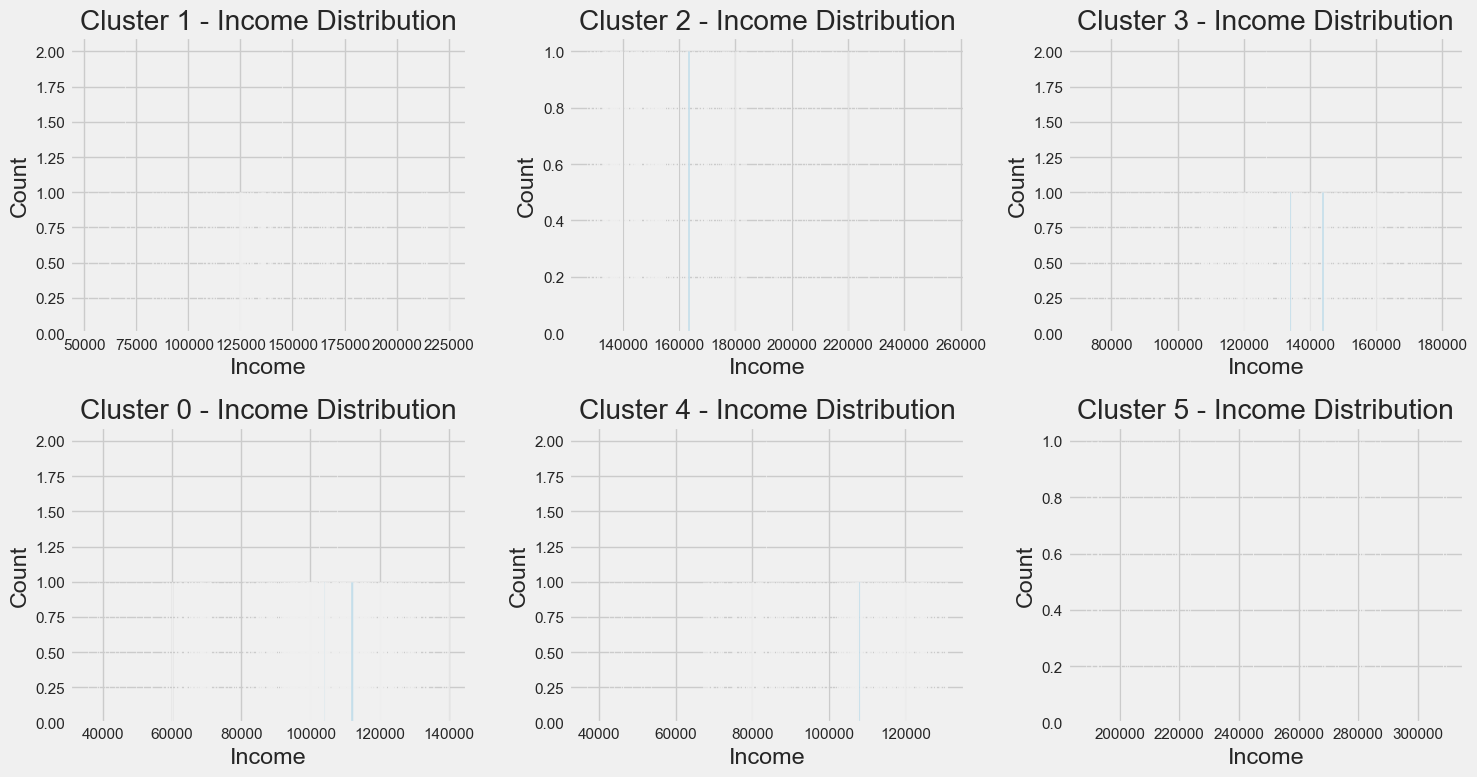

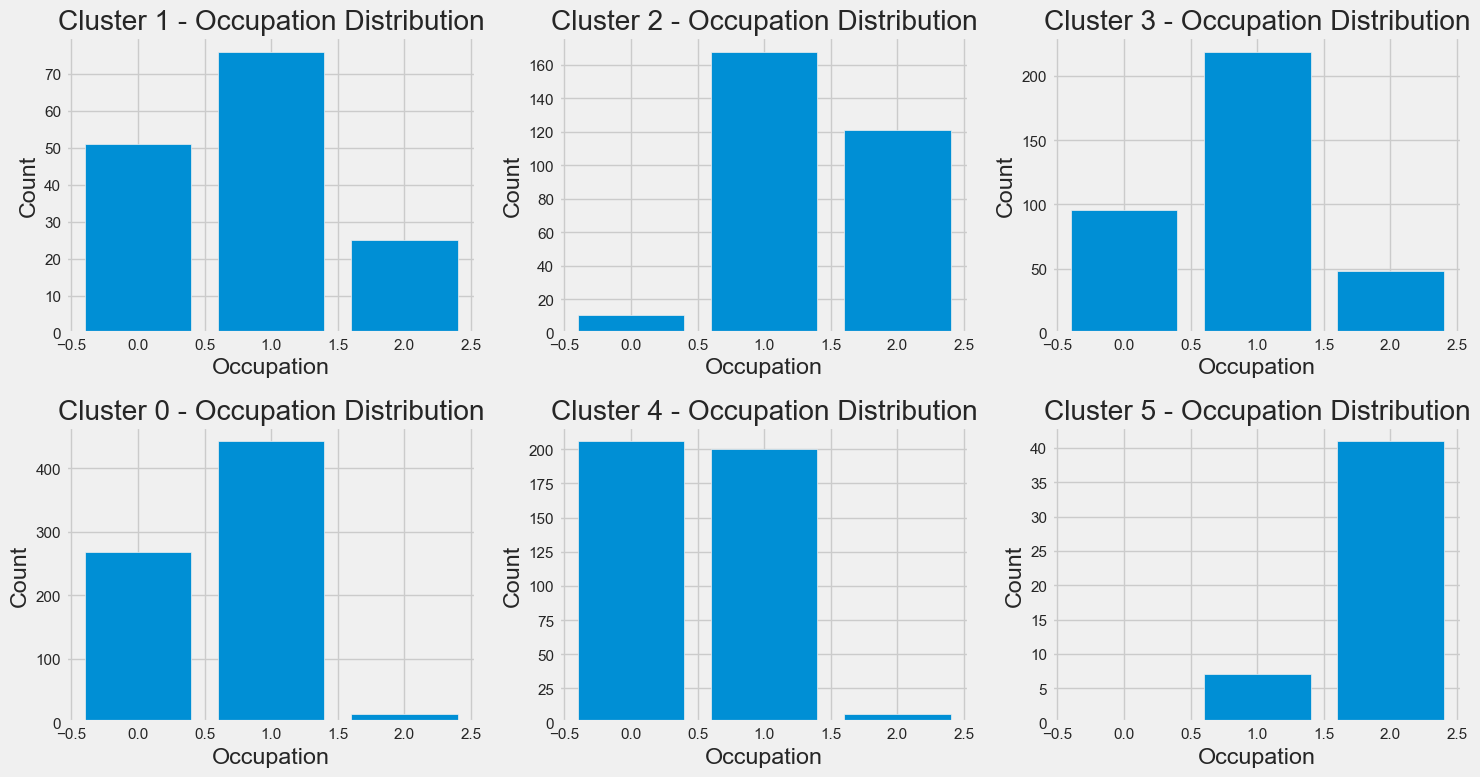

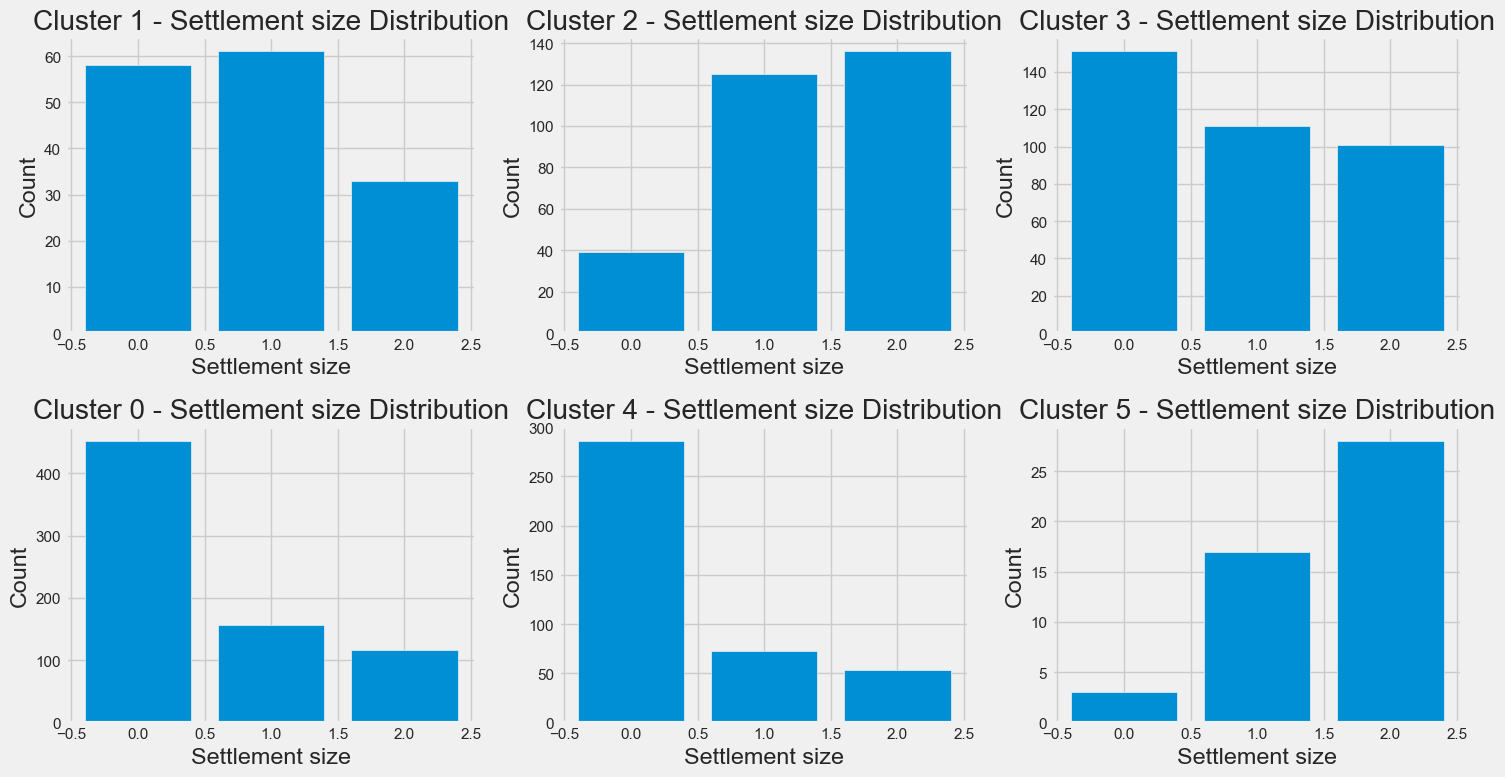

In [100]:
data['Cluster'] = y_hc
unique_clusters = data['Cluster'].unique()


num_clusters = len(unique_clusters)
num_columns = len(data.columns[1:-1])

subplots_per_row = 3


num_rows = (num_clusters + subplots_per_row - 1) // subplots_per_row# floor division

# Iterate over each column (excluding 'ID' and 'Cluster')
for column in data.columns[1:-1]:
    # Create a figure with subplots in a 1x3 grid (three plots in a row)
    fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 4 * num_rows))

    for i, cluster in enumerate(unique_clusters):
        ax = axes[i // subplots_per_row, i % subplots_per_row]
        cluster_data = data[data['Cluster'] == cluster]# fetches only data points that belong to particular cluster
        
        # Get the counts of each unique value in the column for the current cluster
        value_counts = cluster_data[column].value_counts()
        
        # Plot a bar chart showing the counts of each unique value
        ax.bar(value_counts.index, value_counts)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Cluster {cluster} - {column} Distribution')

    plt.tight_layout()
    plt.show()